# ESTUDIO POBLACIONAL DE SUICIDIOS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Objetivo del Notebook 

En este Notebook de Jupyter Vamos a combinar el código que ejecutamos con la tercera version de Python y las conclusiones que sacaremos de cada uno de los procesos.

### Carga de datos

En este caso vamos a insertar el propio archivo en la raiz para facilitar su carga

In [2]:
path='./stats.csv'

df=pd.read_csv(path)

Tras la carga del archivo delimitado por comas, analizaremos su estructura para hacer un primer esbozo de los datos que podemos extraer.

In [3]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [4]:
df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [5]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


Se pueden apreciar las categorías existentes, lo primero que nos hará falta es simplificar el monto total de los datos. 

Agruparemos todos los datos en función del pais donde suceden usando el comando "groupby".

Con ello obtenemos los números de suicidios en bruto, sin tener en cuenta la población total de cada uno de los paises.

In [6]:
grup=df.groupby('country').sum().sort_values('suicides_no', ascending=False)
grup

,year,suicides_no,population
country,,,
Russian Federation,862920,1500992.0,4.868343e+09
United States of America,910860,1201401.0,9.637475e+09
Japan,886668,937614.0,4.340184e+09
France,862488,395500.0,1.973575e+09
Ukraine,791196,365170.0,1.521044e+09
...,...,...,...
Sao Tome and Principe,71472,4.0,2.655000e+05
Iraq,24096,3.0,0.000000e+00
Anguilla,695832,2.0,0.000000e+00


In [7]:
grup[grup.index.name] = grup.index

Tenemos varios problemas en nuestra base de datos.

En primer lugar, datos anómalos que únicamente distorsionan la realidad. 

No resulta lógico que en ciertas regiones no existan los suicidios, por ello filtramos nuestra base de datos para evitar las desviaciones que puedan generarse.

Con la siguiente linea de código nos quedamos con los valores mayores que cero.

In [8]:
grup= grup[grup['population'] != 0]
grup

,year,suicides_no,population,country
country,,,,
Russian Federation,862920,1500992.0,4.868343e+09,Russian Federation
United States of America,910860,1201401.0,9.637475e+09,United States of America
Japan,886668,937614.0,4.340184e+09,Japan
France,862488,395500.0,1.973575e+09,France
Ukraine,791196,365170.0,1.521044e+09,Ukraine
...,...,...,...,...
Maldives,240612,20.0,2.900246e+06,Maldives
Cayman Islands,742536,19.0,7.640000e+04,Cayman Islands
Antigua and Barbuda,671628,11.0,2.054919e+06,Antigua and Barbuda


# Creación de nueva variable "div"

Los datos brutos de suicidios no aportan apenas información, como es lógico, los paises con mayor población tendrán mayor cantidad de suicidios que los paises con menor número de habitantes.

Para estandarizar los datos de suicidios, crearemos la variable "div". 

Esta será el resultado de dividir los suicidios totales entre la poblacion de cada pais, obteniendo un valor de suiciios por habitante. 

Puesto que es un valor dificil de interpretar, en futuros cálculos y gráficas lo converitemos en un valor por millon de habitantes. Al ser un número entero conseguiremos que sea más facil de asimilar para el lector.

In [9]:
grup['div']=grup['suicides_no']/grup['population']
grup.sort_values('div',ascending=False)

<ipython-input-9-605f7adb6547>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grup['div']=grup['suicides_no']/grup['population']


,year,suicides_no,population,country,div
country,,,,,
Bermuda,862920,91.0,1.994000e+05,Bermuda,4.563691e-04
Lithuania,839544,42166.0,1.116514e+08,Lithuania,3.776576e-04
Hungary,910860,130018.0,3.687719e+08,Hungary,3.525703e-04
Sri Lanka,382596,80747.0,2.488106e+08,Sri Lanka,3.245320e-04
Russian Federation,862920,1500992.0,4.868343e+09,Russian Federation,3.083168e-04
...,...,...,...,...,...
Maldives,240612,20.0,2.900246e+06,Maldives,6.895967e-06
Antigua and Barbuda,671628,11.0,2.054919e+06,Antigua and Barbuda,5.353009e-06
Jamaica,526524,198.0,4.918263e+07,Jamaica,4.025812e-06


Obtenemos una primera visión de los 15 mayores resultados, gráficamente se podrá interpretar con mayor facilidad. 

En los próximos pasos haremos uso de un gráfico de barras

In [10]:
qgrup=grup.sort_values('div',ascending=False).head(15)

In [11]:
qgrup

,year,suicides_no,population,country,div
country,,,,,
Bermuda,862920,91.0,1.994000e+05,Bermuda,0.000456
Lithuania,839544,42166.0,1.116514e+08,Lithuania,0.000378
Hungary,910860,130018.0,3.687719e+08,Hungary,0.000353
Sri Lanka,382596,80747.0,2.488106e+08,Sri Lanka,0.000325
Russian Federation,862920,1500992.0,4.868343e+09,Russian Federation,0.000308
Latvia,862920,24861.0,8.093534e+07,Latvia,0.000307
Slovenia,744000,16805.0,5.897722e+07,Slovenia,0.000285
Estonia,815352,12671.0,4.543920e+07,Estonia,0.000279
Kazakhstan,815352,123151.0,4.895167e+08,Kazakhstan,0.000252


# Eliminado de valores poco representativos

En un primer vistazo crítico a los datos, vemos dos valores de los cuales nos vamos a deshacer, las filas correspondientes a Islas Caimán y Bermudas. 

Ambas tienen menos de 100 suicidios en todo el registro. Por ello las eliminaremos, ya que pueden desvirtuar la imagen global.

In [12]:
mod=qgrup[qgrup['suicides_no']>100]
mod

,year,suicides_no,population,country,div
country,,,,,
Lithuania,839544,42166.0,1.116514e+08,Lithuania,0.000378
Hungary,910860,130018.0,3.687719e+08,Hungary,0.000353
Sri Lanka,382596,80747.0,2.488106e+08,Sri Lanka,0.000325
Russian Federation,862920,1500992.0,4.868343e+09,Russian Federation,0.000308
Latvia,862920,24861.0,8.093534e+07,Latvia,0.000307
Slovenia,744000,16805.0,5.897722e+07,Slovenia,0.000285
Estonia,815352,12671.0,4.543920e+07,Estonia,0.000279
Kazakhstan,815352,123151.0,4.895167e+08,Kazakhstan,0.000252
Ukraine,791196,365170.0,1.521044e+09,Ukraine,0.000240


Procedemos a graficar las 13 mayores tasas de suicidio per capita del mundo:

<AxesSubplot:xlabel='country', ylabel='div'>

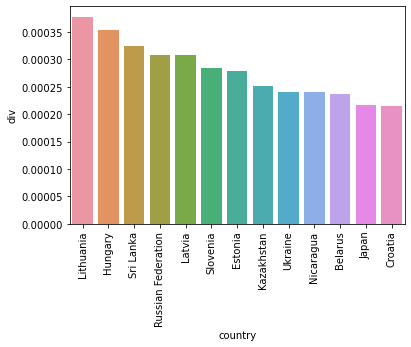

In [13]:
plt.xticks(rotation=90)
sns.barplot(x='country', y='div', data=mod)


# Primeras conclusiones

En un vistazo a nuestro gráfico apreciamos que los datos tienden a centrarse en la zona geográfica de los paises eslavos. 


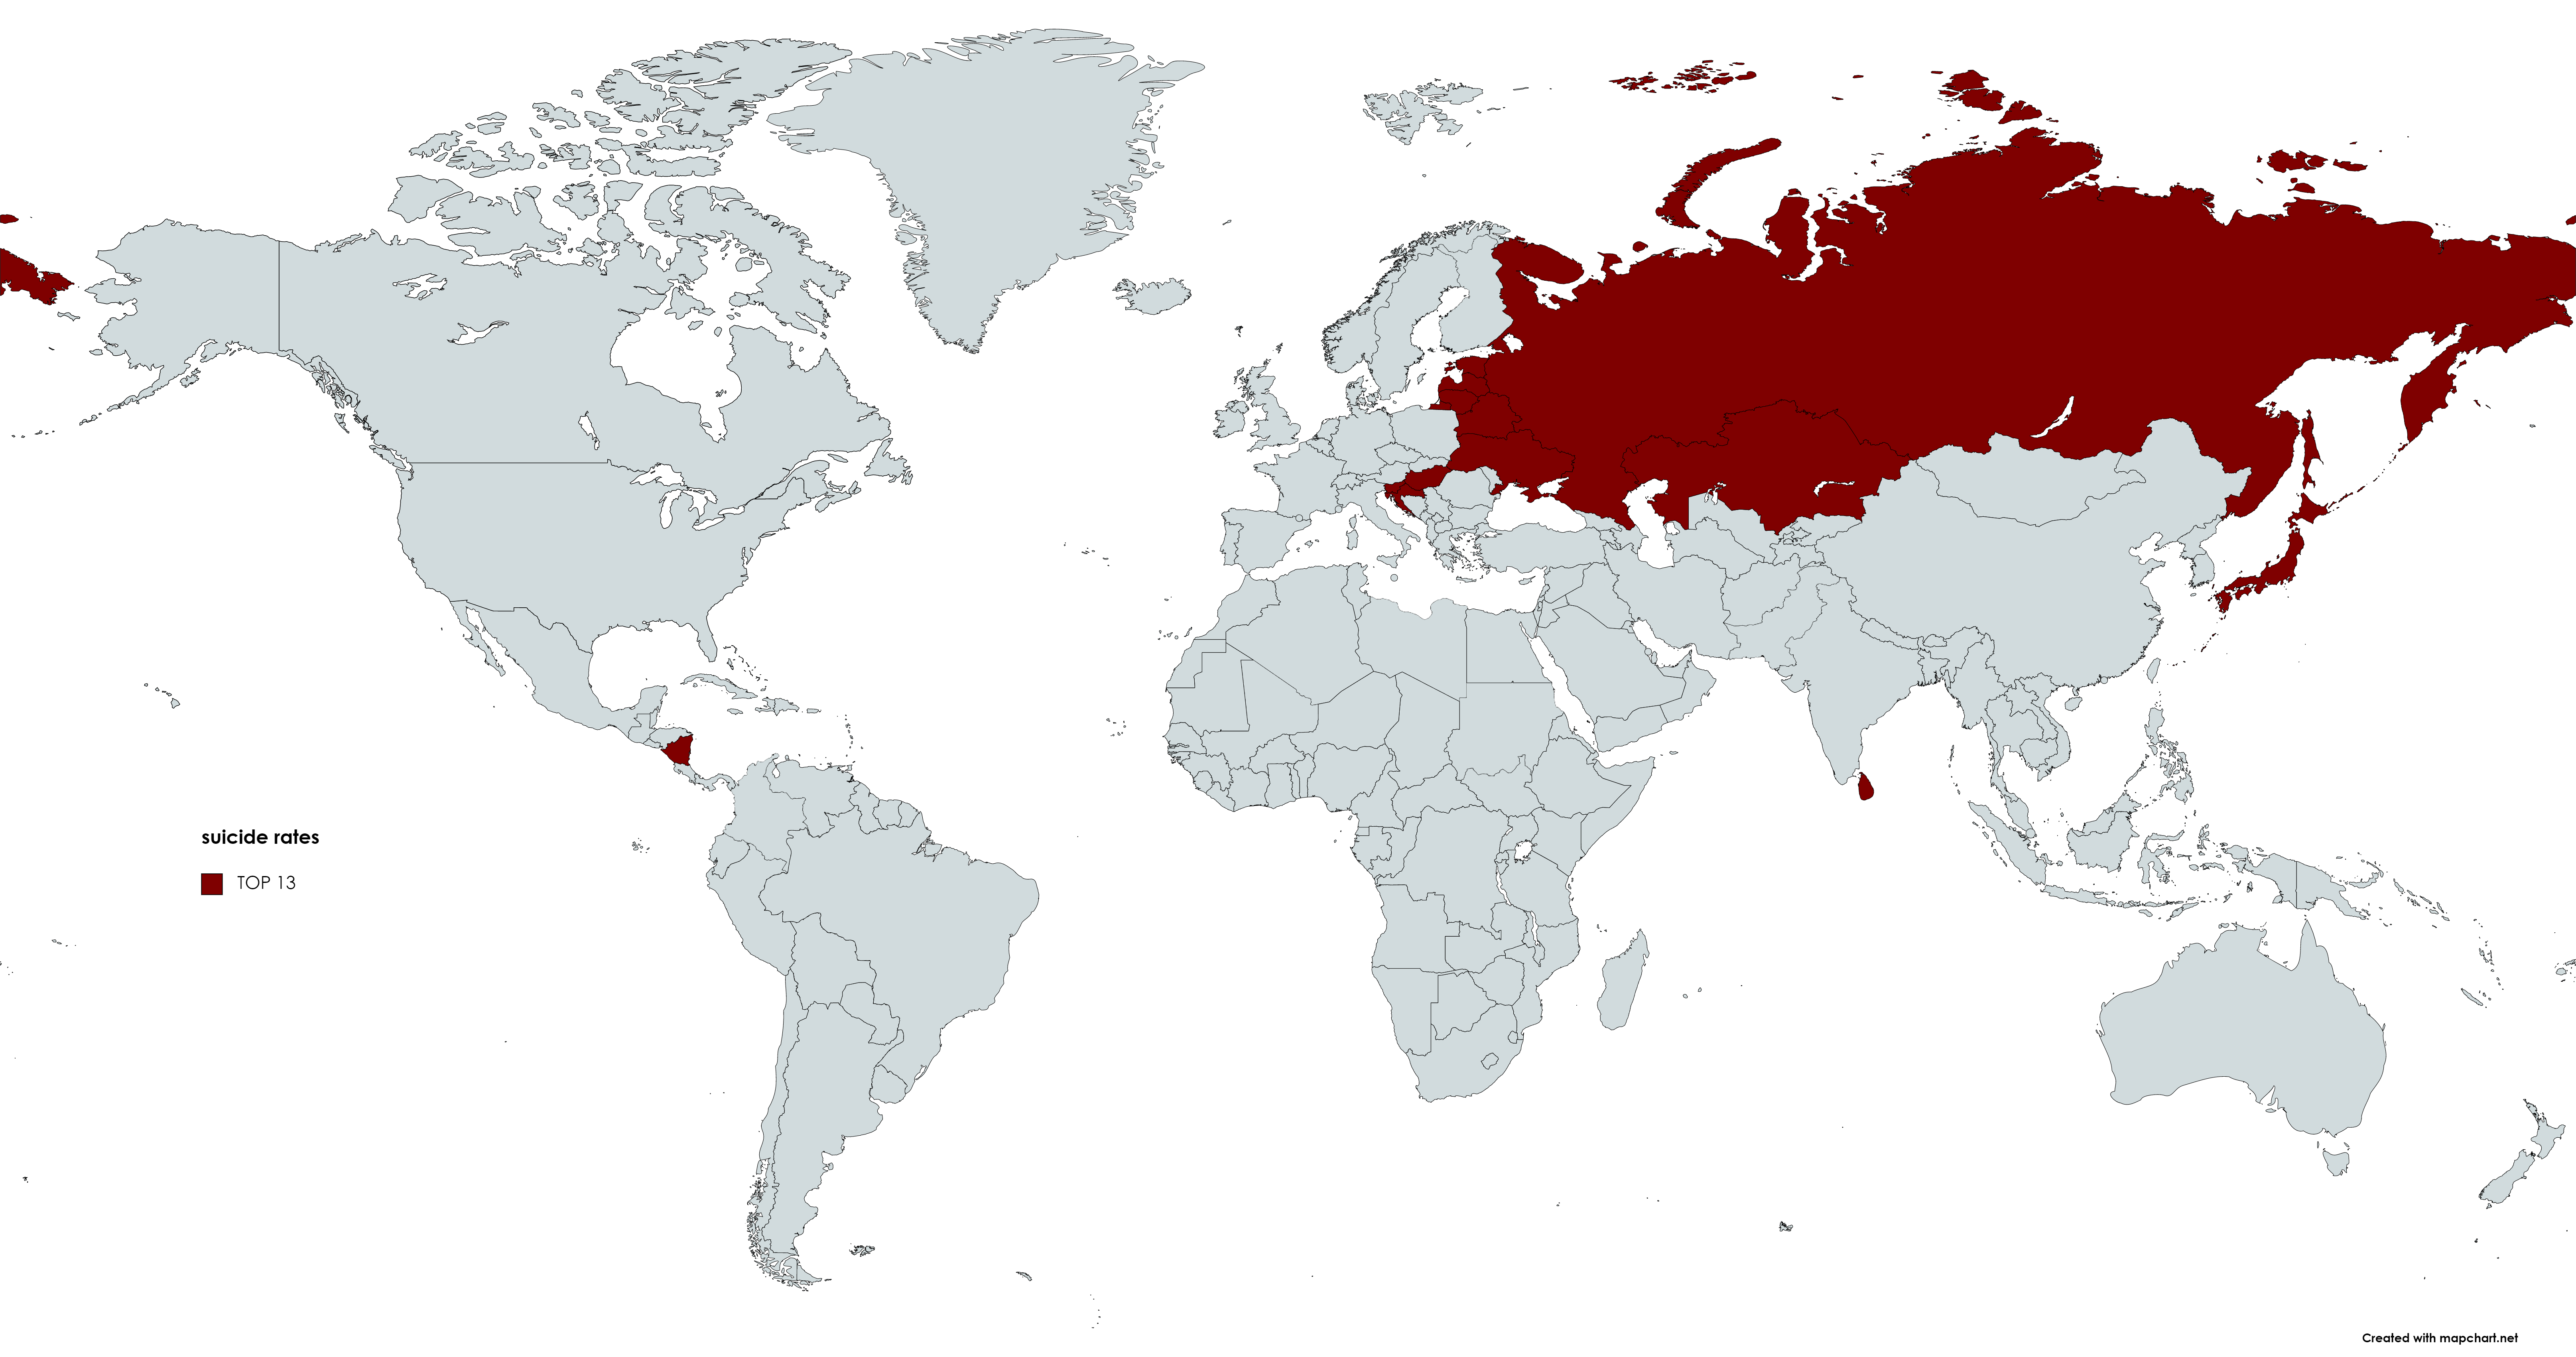

Este dato puede estar relacionado con una conjunción de problemas que favorezcan dichas actitudes, tales como las escasas horas de sol, los problemas con el alcoholismo y las costumbres culturales de dichas zonas, asociadas a las inclemencias climatológicas en los meses invernales.

Por ello, vamos a estudiar la incidencia global de dichos factores en la población mundial en el siguiente apartado.

## Estudio de correlaciones

Primero se elige un año como referencia. 
Usaremos el 2010 para tener un año que permita obtener los valores del resto de variables aunque no se hayan actualizado en la última decada.

In [14]:
#df['year'].max()
ndf=df[df['year']==2010]
ndf

,country,year,sex,age,suicides_no,population
300,Albania,2010,female,15-24 years,6.0,263581.0
301,Albania,2010,female,25-34 years,6.0,183579.0
302,Albania,2010,female,35-54 years,12.0,394593.0
303,Albania,2010,female,5-14 years,2.0,223969.0
304,Albania,2010,female,55-74 years,7.0,241491.0
...,...,...,...,...,...,...
43723,Virgin Islands (USA),2010,male,25-34 years,1.0,5472.0
43724,Virgin Islands (USA),2010,male,35-54 years,2.0,14141.0
43725,Virgin Islands (USA),2010,male,5-14 years,0.0,7510.0
43726,Virgin Islands (USA),2010,male,55-74 years,1.0,11537.0


In [15]:
pop=ndf.groupby('country').population.sum()

print(pop)

suma=ndf.groupby('country').suicides_no.sum()


#suma

country
Albania                                 2736025.0
Anguilla                                      0.0
Argentina                              37578454.0
Armenia                                 2676225.0
Aruba                                     95006.0
                                         ...     
United States of America              287839149.0
Uruguay                                 3127306.0
Uzbekistan                             25651783.0
Venezuela (Bolivarian Republic of)     26078766.0
Virgin Islands (USA)                      98658.0
Name: population, Length: 117, dtype: float64


In [16]:
siuma=suma.to_frame()
pop1=pop.to_frame()

siuma=siuma.reset_index()
summi=siuma.reset_index(drop=True)
summi

,country,suicides_no
0,Albania,96.0
1,Anguilla,0.0
2,Argentina,2943.0
3,Armenia,73.0
4,Aruba,7.0
...,...,...
112,United States of America,38362.0
113,Uruguay,547.0
114,Uzbekistan,1464.0
115,Venezuela (Bolivarian Republic of),775.0


Aquí tenemos una base de datos donde hemos sumado todos los valores, tanto en hombres como en mujeres y en todos los estratos de edad, simplificando así la misma y obteniendo una columna por pais.

In [17]:
pop1=pop1.reset_index()
pop1

,country,population
0,Albania,2736025.0
1,Anguilla,0.0
2,Argentina,37578454.0
3,Armenia,2676225.0
4,Aruba,95006.0
...,...,...
112,United States of America,287839149.0
113,Uruguay,3127306.0
114,Uzbekistan,25651783.0
115,Venezuela (Bolivarian Republic of),26078766.0


In [18]:
summ2=summi.merge(pop1, on='country')
summ2

,country,suicides_no,population
0,Albania,96.0,2736025.0
1,Anguilla,0.0,0.0
2,Argentina,2943.0,37578454.0
3,Armenia,73.0,2676225.0
4,Aruba,7.0,95006.0
...,...,...,...
112,United States of America,38362.0,287839149.0
113,Uruguay,547.0,3127306.0
114,Uzbekistan,1464.0,25651783.0
115,Venezuela (Bolivarian Republic of),775.0,26078766.0


Ahora obtenemos el ratio de suicidios por habitante como en la anterior ocasión.

In [19]:
summ2['suir']=summ2['suicides_no']/summ2['population']
summ2

,country,suicides_no,population,suir
0,Albania,96.0,2736025.0,0.000035
1,Anguilla,0.0,0.0,NaN
2,Argentina,2943.0,37578454.0,0.000078
3,Armenia,73.0,2676225.0,0.000027
4,Aruba,7.0,95006.0,0.000074
...,...,...,...,...
112,United States of America,38362.0,287839149.0,0.000133
113,Uruguay,547.0,3127306.0,0.000175
114,Uzbekistan,1464.0,25651783.0,0.000057
115,Venezuela (Bolivarian Republic of),775.0,26078766.0,0.000030


In [20]:
summ=summ2[['country','suir']].copy()
summ

,country,suir
0,Albania,0.000035
1,Anguilla,NaN
2,Argentina,0.000078
3,Armenia,0.000027
4,Aruba,0.000074
...,...,...
112,United States of America,0.000133
113,Uruguay,0.000175
114,Uzbekistan,0.000057
115,Venezuela (Bolivarian Republic of),0.000030


In [21]:
summ.rename(columns = {'suir':'suicides_no'}, inplace = True)

In [22]:
summ

,country,suicides_no
0,Albania,0.000035
1,Anguilla,NaN
2,Argentina,0.000078
3,Armenia,0.000027
4,Aruba,0.000074
...,...,...
112,United States of America,0.000133
113,Uruguay,0.000175
114,Uzbekistan,0.000057
115,Venezuela (Bolivarian Republic of),0.000030


Ahora nos deshacemos de los valores nulos para evitar problemas a la hora de graficar la misma.

In [23]:
summ=summ.dropna()
summ=summ[summ['suicides_no']< 10000]
summ

,country,suicides_no
0,Albania,0.000035
2,Argentina,0.000078
3,Armenia,0.000027
4,Aruba,0.000074
5,Australia,0.000116
...,...,...
112,United States of America,0.000133
113,Uruguay,0.000175
114,Uzbekistan,0.000057
115,Venezuela (Bolivarian Republic of),0.000030


Ya tenemos una lista del total de suicidios del años 2010, con estos datos podremos comparar todas las problemáticas correladas

## Obtención de datos externos

Ahora el problema reside en obtener los valores de las encuestas y cruzarlos con los que tenemos en nuestro Dataframe

Cargamos el formato de felicidad, obtenido en https://worldhappiness.report/ed/2013/

In [24]:
dfs = pd.read_excel('feli.xlsx', sheet_name='Hoja1',
                index_col=0)
dfs=dfs.reset_index()
dfs

,Country,Happiness score
0,Afghanistan,2.404
1,Albania,5.199
2,Algeria,5.122
3,Argentina,5.967
4,Armenia,5.399
...,...,...
142,Vietnam,5.485
143,xx,NaN
144,Yemen*,4.197
145,Zambia,3.760


In [25]:
dfs.dtypes

Country             object
Happiness score    float64
dtype: object

In [26]:
summ.dtypes

country         object
suicides_no    float64
dtype: object

In [27]:
dfs.rename(columns = {'Country':'country'}, inplace = True)
dfs

,country,Happiness score
0,Afghanistan,2.404
1,Albania,5.199
2,Algeria,5.122
3,Argentina,5.967
4,Armenia,5.399
...,...,...
142,Vietnam,5.485
143,xx,NaN
144,Yemen*,4.197
145,Zambia,3.760


En este momento podemos apreciar que los datos que nos ofrecen ambas bases de datos no son las mismas.
Por ello deberemos de ejecutar un comando que nos busque coincidencias en la columna de paises y en los que aparezcan las mismas, añadiremos una columna para unir ambas bases. 

Este comando "Merge", es usado en SQL con el nombre "JOIN"

Adjuntamos la explicación gráfica del proceso computacional

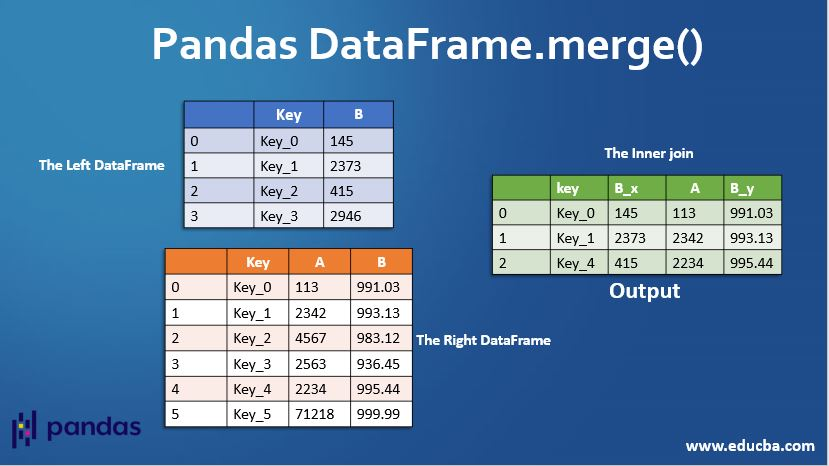

In [28]:
hue=summ.merge(dfs, on='country')
hue.head()


,country,suicides_no,Happiness score
0,Albania,0.000035,5.199
1,Argentina,0.000078,5.967
2,Armenia,0.000027,5.399
3,Australia,0.000116,7.162
4,Austria,0.000159,7.163


Para mayor facilidad, procedemos a multiplicar el valor se los suicidios per capita para obtener el
factor en millones

In [29]:
hue['suicides_no']=hue['suicides_no']*1000000
hue

,country,suicides_no,Happiness score
0,Albania,35.087399,5.199
1,Argentina,78.316154,5.967
2,Armenia,27.277228,5.399
3,Australia,116.080803,7.162
4,Austria,158.626157,7.163
...,...,...,...
60,Ukraine,209.923092,5.084
61,United Arab Emirates,14.158640,6.576
62,United Kingdom,71.707996,6.943
63,Uruguay,174.910930,6.474


In [30]:
hue=hue[hue['suicides_no']< 10000]
huel=hue.sort_values('suicides_no', ascending=False).head(15)
huel

,country,suicides_no,Happiness score
36,Lithuania,345.115514,6.446
26,Hungary,261.614325,6.086
33,Kazakhstan,245.290494,6.234
32,Japan,242.810729,6.039
35,Latvia,220.332350,6.180
53,Slovenia,212.878206,6.630
60,Ukraine,209.923092,5.084
6,Belgium,197.137037,6.805
21,Finland,188.407451,7.821
14,Croatia,184.587733,6.125


Finalmente, graficaremos los datos para obtener los resultados de un solo vistazo. 
Podemos observar que de los datos restantes aparece una gran diferencia entre el primer resultado (Lituania) y el resto.

<AxesSubplot:xlabel='country', ylabel='suicides_no'>

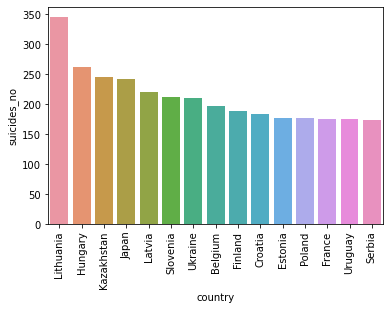

In [31]:
plt.xticks(rotation=90)
sns.barplot(x='country', y='suicides_no', data=huel)


# Resultados respecto a los índices de felicidad:

#### ¿Qué son estos índices y cómo se obtienen?

Desde 2002, el Informe Mundial de la Felicidad ha utilizado análisis estadísticos para determinar los países más felices del mundo. En su actualización de 2021, el informe concluyó que Finlandia es el país más feliz del mundo.

Para determinar el país más feliz del mundo, los investigadores analizaron datos completos de encuestas de Gallup de 149 países durante los últimos tres años, monitoreando específicamente el desempeño en seis categorías particulares: 

Producto Interior Bruto per cápita

Apoyo social

Esperanza de vida saludable

Libertad para tomar sus propias decisiones de vida.

Generosidad de la población en general

Percepciones de los niveles de corrupción interna y externa.




#### Procedimiento general

En este caso, vamos a plasmar los datos en un gráfico de dispersión. 

Con ellos podremos analizar mediante un vistazo la distribución, posibles tendencias y correlaciones existentes entre los datos. 

Repetiremos este mismo procedimiento con los datos de: Horas de sol, litros de alcohol consumidos y horas de sol

Vamos a aprovechar la función "regplot" integrada en el módulo Seaborn para representar tanto la dispersión como la recta de regresión con un intervalo de confianza de 95 indicado en la zona sombreada.

Seaborn es una biblioteca de visualización de datos basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

<AxesSubplot:xlabel='Happiness score', ylabel='suicides_no'>

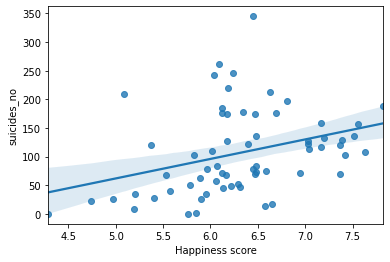

In [89]:
sns.regplot(x="Happiness score",
                    y="suicides_no",ci=95, 
                    data=hue)

In [33]:
hue.dtypes

country             object
suicides_no        float64
Happiness score    float64
dtype: object

#### Cálculo de ecuación de la recta de regresión

Por otro lado, el módulo Seaborn no nos permite encontrar la ecuación de la recta regresiva, por ello haremos uso de SciKit Learn, esta cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías de Python como NumPy, SciPy y matplotlib.. 

Con ello podemos calcular los puntos de intersección con el eje "Y" y la pendiente de la misma. 

Así podremos caracterizarla mediante la ecuación general de una recta: f(x)= m·x + n

In [90]:
from sklearn.linear_model import LinearRegression


Procedemos a cambiar la estructura de las matrices para conseguir que la librería las interprete correctamente.

In [35]:
x = hue['Happiness score'].values.reshape(-1, 1)
y = hue['suicides_no'].values.reshape(-1, 1)

In [91]:
model = LinearRegression()

Ahora adaptamos los datos de entrada al modelo de regresión lineal

In [93]:
model.fit(x, y)

LinearRegression()

Y por último obtenemos los parámetros característicos de la ecuación.

Es importante tener en cuenta que, en algunos campos, es admisible que los valores de R-cuadrado sean bajos. 

Por ejemplo, cualquier campo que intente predecir el comportamiento humano, como la psicología, normalmente tiene valores de R-cuadrado inferiores al 50 %. Los humanos son simplemente más difíciles de predecir que, digamos, los procesos físicos.

In [38]:
r_sq = model.score(x, y)
print(f"Coeficiente de determinación: {r_sq}")


Coeficiente de determinación: 0.11536212749865449


In [39]:
print(f"Intersección con el eje y: {model.intercept_}")

Intersección con el eje y: [-108.53148557]


In [103]:
print(f"Pendiente: {model.coef_}")

Pendiente: [[0.00559558]]


Por último, calculamos la correlación entre ambos datos para poder hacer una comparación de los distintos factores y su impacto.

In [104]:
hue.corr()

,suicides_no,Happiness score
suicides_no,1.00000,0.33965
Happiness score,0.33965,1.00000


# Consumo de alcohol anual

En este caso obtenemos una base de datos más sucio, puesto que nos da un intervalo de confianza con CI al 95, además de muchos otros datos que no serán utilizados en esta ocasión.

In [106]:
alc=pd.read_csv('./alc.csv')
alc.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

En primer lugar vamos a obtener únicamente los datos para ambos sexos, a pesar de que perdamos precisión puesto que como vimos en el primer apartado, este es un fenómeno prominentemente masculino.

In [107]:
alc1=alc[alc['Dim1']=='Both sexes']
alc1

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,EUR,Europe,Country,MCO,Monaco,Year,2016,...,NaN,NaN,NaN,NaN,NaN,. [.-],NaN,NaN,EN,2018-08-22T22:00:00.000Z
3,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,EUR,Europe,Country,SMR,San Marino,Year,2016,...,NaN,NaN,NaN,NaN,NaN,. [.-],NaN,NaN,EN,2018-08-22T22:00:00.000Z
11,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,SEAR,South-East Asia,Country,BGD,Bangladesh,Year,2016,...,NaN,NaN,0.9,NaN,1.0,0.9 [0.9 – 1],NaN,NaN,EN,2018-08-22T22:00:00.000Z
12,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,EMR,Eastern Mediterranean,Country,KWT,Kuwait,Year,2016,...,NaN,NaN,0.8,NaN,1.5,1.1 [0.8 – 1.5],NaN,NaN,EN,2018-08-22T22:00:00.000Z
17,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,WPR,Western Pacific,Country,BRN,Brunei Darussalam,Year,2016,...,NaN,NaN,1.2,NaN,1.3,1.3 [1.2 – 1.3],NaN,NaN,EN,2018-08-22T22:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,AMR,Americas,Country,GTM,Guatemala,Year,2016,...,NaN,NaN,8.5,NaN,9.4,8.9 [8.5 – 9.4],NaN,NaN,EN,2018-08-22T22:00:00.000Z
566,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,AFR,Africa,Country,MDG,Madagascar,Year,2016,...,NaN,NaN,8.8,NaN,9.9,9.4 [8.8 – 9.9],NaN,NaN,EN,2018-08-22T22:00:00.000Z
568,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,AMR,Americas,Country,ECU,Ecuador,Year,2016,...,NaN,NaN,9.3,NaN,10.0,9.6 [9.3 – 10],NaN,NaN,EN,2018-08-22T22:00:00.000Z
569,SA_0000001404,"Alcohol, drinkers only per capita (15+)consump...",numeric,SEAR,South-East Asia,Country,TLS,Timor-Leste,Year,2016,...,NaN,NaN,9.0,NaN,10.5,9.7 [9 – 10.5],NaN,NaN,EN,2018-08-22T22:00:00.000Z


A continuación nos deshacemos de todos los datos que en esta ocasión no son necesarios para obtener unicamente el valor y la ubicación

In [44]:
alc2=alc1[['Location', 'Value']].copy()
alc2

,Location,Value
0,Monaco,. [.-]
3,San Marino,. [.-]
11,Bangladesh,0.9 [0.9 – 1]
12,Kuwait,1.1 [0.8 – 1.5]
17,Brunei Darussalam,1.3 [1.2 – 1.3]
...,...,...
551,Guatemala,8.9 [8.5 – 9.4]
566,Madagascar,9.4 [8.8 – 9.9]
568,Ecuador,9.6 [9.3 – 10]
569,Timor-Leste,9.7 [9 – 10.5]


In [108]:
alc2.columns

Index(['Location', 'Value'], dtype='object')

Eliminamos todos los datos nulos que se nos aportan en formato de texto de la siguiente forma: . [.-]

In [109]:
alc3=alc2[alc2['Value'] != '. [.-]']
alc3

,Location,Value
11,Bangladesh,0.9 [0.9 – 1]
12,Kuwait,1.1 [0.8 – 1.5]
17,Brunei Darussalam,1.3 [1.2 – 1.3]
18,Somalia,1.3 [1.2 – 1.4]
29,Bhutan,1.9 [1.8 – 2.1]
...,...,...
551,Guatemala,8.9 [8.5 – 9.4]
566,Madagascar,9.4 [8.8 – 9.9]
568,Ecuador,9.6 [9.3 – 10]
569,Timor-Leste,9.7 [9 – 10.5]


Por último vamos a separar la cadena de texto en cuatro columnas: El valor y los correspondientes al intervalo. 

Nos quedaremos únicamente con el primero.

In [47]:
alc3[['Valor','1','2', '3']] = alc3.Value.str.split(" ",expand=True)
alc3

C:\Users\Paula\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Location,Value,Valor,1,2,3
11,Bangladesh,0.9 [0.9 – 1],0.9,[0.9,–,1]
12,Kuwait,1.1 [0.8 – 1.5],1.1,[0.8,–,1.5]
17,Brunei Darussalam,1.3 [1.2 – 1.3],1.3,[1.2,–,1.3]
18,Somalia,1.3 [1.2 – 1.4],1.3,[1.2,–,1.4]
29,Bhutan,1.9 [1.8 – 2.1],1.9,[1.8,–,2.1]
...,...,...,...,...,...,...
551,Guatemala,8.9 [8.5 – 9.4],8.9,[8.5,–,9.4]
566,Madagascar,9.4 [8.8 – 9.9],9.4,[8.8,–,9.9]
568,Ecuador,9.6 [9.3 – 10],9.6,[9.3,–,10]
569,Timor-Leste,9.7 [9 – 10.5],9.7,[9,–,10.5]


In [48]:
alc4=alc3[['Location', 'Valor']].copy()
alc4

,Location,Valor
11,Bangladesh,0.9
12,Kuwait,1.1
17,Brunei Darussalam,1.3
18,Somalia,1.3
29,Bhutan,1.9
...,...,...
551,Guatemala,8.9
566,Madagascar,9.4
568,Ecuador,9.6
569,Timor-Leste,9.7


In [49]:
alc4.rename(columns = {'Location':'country'}, inplace = True)
alc4

,country,Valor
11,Bangladesh,0.9
12,Kuwait,1.1
17,Brunei Darussalam,1.3
18,Somalia,1.3
29,Bhutan,1.9
...,...,...
551,Guatemala,8.9
566,Madagascar,9.4
568,Ecuador,9.6
569,Timor-Leste,9.7


Repetiremos el procedimiento seguido en el anterior análisis

In [50]:
alcf=summ.merge(alc4, on='country')
alcf.head()

,country,suicides_no,Valor
0,Albania,0.000035,14.5
1,Argentina,0.000078,15.1
2,Armenia,0.000027,22.2
3,Australia,0.000116,13.5
4,Austria,0.000159,14.8


In [51]:
alcf.dtypes

country         object
suicides_no    float64
Valor           object
dtype: object

In [52]:
alcf["Valor"] = pd.to_numeric(alcf["Valor"])
alcf["suicides_no"]=alcf["suicides_no"]*1000000

In [53]:
alcf.dtypes

country         object
suicides_no    float64
Valor          float64
dtype: object

In [54]:
#print(alcf.to_string())

<AxesSubplot:xlabel='Valor', ylabel='suicides_no'>

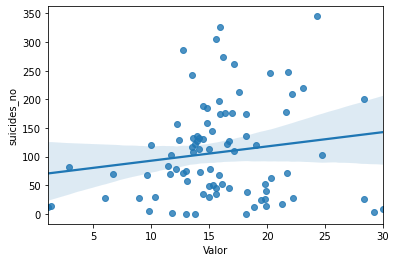

In [55]:
sns.regplot(x="Valor",
                    y="suicides_no",
                    data=alcf)

#### Cálculo de ecuación de la recta de regresión

In [56]:
from sklearn.linear_model import LinearRegression
x = alcf['Valor'].values.reshape(-1, 1)
y = alcf['suicides_no'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(f"Coeficiente de determinación: {r_sq}")
print(f"Intersección con el eje y: {model.intercept_}")
print(f"Pendiente: {model.coef_}")

Coeficiente de determinación: 0.024888803834322126
Intersección con el eje y: [67.96994988]
Pendiente: [[2.4943302]]


In [57]:
alcf.corr()

,suicides_no,Valor
suicides_no,1.000000,0.157762
Valor,0.157762,1.000000


In [58]:
sol=pd.read_csv('./sol.csv')
sol

,Country or Territory,Period,Statistic Description,Jan,Jan Footnotes,Feb,Feb Footnotes,Mar,Mar Footnotes,Apr,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,"AFGHANISTAN, ISLAMIC STATE OF",1964-1983,Mean Number of Hours,117.3,NaN,116.7,NaN,149.2,NaN,186.2,...,224.2,NaN,176.4,NaN,127.3,NaN,205.3,NaN,2576.6,NaN
1,"AFGHANISTAN, ISLAMIC STATE OF",1964-1983,Mean Number of Hours,115.3,NaN,124.1,NaN,162.3,NaN,198.2,...,242.9,NaN,175.8,NaN,125.7,NaN,236.9,NaN,2823.1,NaN
2,"AFGHANISTAN, ISLAMIC STATE OF",1959-1983,Mean Number of Hours,122.2,NaN,118.4,NaN,158.1,NaN,193.8,...,223.2,NaN,173.6,NaN,125.5,NaN,229.9,NaN,2762.9,NaN
3,"AFGHANISTAN, ISLAMIC STATE OF",1958-1983,Mean Number of Hours,114.4,NaN,114.6,NaN,158.9,NaN,201.0,...,221.8,NaN,169.3,NaN,118.3,NaN,229.5,NaN,2652.3,NaN
4,"AFGHANISTAN, ISLAMIC STATE OF",1959-1983,Mean Number of Hours,136.6,NaN,117.7,NaN,169.3,NaN,195.9,...,237.2,NaN,159.1,NaN,137.9,NaN,239.6,NaN,2866.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,ZIMBABWE,1961-1990,Mean Number of Hours,248.0,NaN,207.2,NaN,244.9,NaN,243.0,...,260.4,NaN,228.0,NaN,217.0,NaN,2991.8,NaN,2991.8,NaN
1960,ZIMBABWE,1961-1990,Mean Number of Hours,7.6,NaN,7.0,NaN,7.3,NaN,7.8,...,8.0,NaN,7.6,NaN,6.8,NaN,-9999.9,1.0,-9999.9,1.0
1961,ZIMBABWE,1961-1990,Mean Number of Hours,235.6,NaN,196.0,NaN,226.3,NaN,234.0,...,248.0,NaN,228.0,NaN,210.8,NaN,2848.7,NaN,2848.7,NaN
1962,footnoteSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
sol1=sol[['Country or Territory', 'Annual']].copy()
sol1

,Country or Territory,Annual
0,"AFGHANISTAN, ISLAMIC STATE OF",205.3
1,"AFGHANISTAN, ISLAMIC STATE OF",236.9
2,"AFGHANISTAN, ISLAMIC STATE OF",229.9
3,"AFGHANISTAN, ISLAMIC STATE OF",229.5
4,"AFGHANISTAN, ISLAMIC STATE OF",239.6
...,...,...
1959,ZIMBABWE,2991.8
1960,ZIMBABWE,-9999.9
1961,ZIMBABWE,2848.7
1962,footnoteSeqID,NaN


In [60]:
sol2=sol1.dropna()
sol2

,Country or Territory,Annual
0,"AFGHANISTAN, ISLAMIC STATE OF",205.3
1,"AFGHANISTAN, ISLAMIC STATE OF",236.9
2,"AFGHANISTAN, ISLAMIC STATE OF",229.9
3,"AFGHANISTAN, ISLAMIC STATE OF",229.5
4,"AFGHANISTAN, ISLAMIC STATE OF",239.6
...,...,...
1957,ZIMBABWE,3119.9
1958,ZIMBABWE,-9999.9
1959,ZIMBABWE,2991.8
1960,ZIMBABWE,-9999.9


In [61]:
sol3=sol2[sol2['Annual'] > 0]
sol3

,Country or Territory,Annual
0,"AFGHANISTAN, ISLAMIC STATE OF",205.3
1,"AFGHANISTAN, ISLAMIC STATE OF",236.9
2,"AFGHANISTAN, ISLAMIC STATE OF",229.9
3,"AFGHANISTAN, ISLAMIC STATE OF",229.5
4,"AFGHANISTAN, ISLAMIC STATE OF",239.6
...,...,...
1953,ZIMBABWE,3010.9
1955,ZIMBABWE,3119.9
1957,ZIMBABWE,3119.9
1959,ZIMBABWE,2991.8


In [62]:
sol3=sol3.groupby('Country or Territory').Annual.mean()
sol3

Country or Territory
AFGHANISTAN, ISLAMIC STATE OF     249.330000
ALBANIA                          2404.683333
ARGENTINA                        1296.510000
AUSTRALIA                        2746.770000
BAHAMAS                          2878.400000
                                    ...     
UZBEKISTAN                       2836.780000
VENEZUELA                        1300.237500
YUGOSLAVIA                       2252.700000
ZAMBIA                           2853.004000
ZIMBABWE                         2994.350000
Name: Annual, Length: 84, dtype: float64

In [63]:
sol3=sol3.to_frame()
sol3=sol3.reset_index()
sol3

,Country or Territory,Annual
0,"AFGHANISTAN, ISLAMIC STATE OF",249.330000
1,ALBANIA,2404.683333
2,ARGENTINA,1296.510000
3,AUSTRALIA,2746.770000
4,BAHAMAS,2878.400000
...,...,...
79,UZBEKISTAN,2836.780000
80,VENEZUELA,1300.237500
81,YUGOSLAVIA,2252.700000
82,ZAMBIA,2853.004000


In [64]:
#print(sol3.to_string())

In [65]:
sol3.rename(columns = {'Country or Territory':'country'}, inplace = True)
sol3

,country,Annual
0,"AFGHANISTAN, ISLAMIC STATE OF",249.330000
1,ALBANIA,2404.683333
2,ARGENTINA,1296.510000
3,AUSTRALIA,2746.770000
4,BAHAMAS,2878.400000
...,...,...
79,UZBEKISTAN,2836.780000
80,VENEZUELA,1300.237500
81,YUGOSLAVIA,2252.700000
82,ZAMBIA,2853.004000


In [66]:
summ['country']=summ['country'].str.upper()
summ

,country,suicides_no
0,ALBANIA,0.000035
2,ARGENTINA,0.000078
3,ARMENIA,0.000027
4,ARUBA,0.000074
5,AUSTRALIA,0.000116
...,...,...
112,UNITED STATES OF AMERICA,0.000133
113,URUGUAY,0.000175
114,UZBEKISTAN,0.000057
115,VENEZUELA (BOLIVARIAN REPUBLIC OF),0.000030


In [67]:
solf=summ.merge(sol3, on='country')
solf.head()

,country,suicides_no,Annual
0,ALBANIA,0.000035,2404.683333
1,ARGENTINA,0.000078,1296.510000
2,AUSTRALIA,0.000116,2746.770000
3,BAHAMAS,0.000030,2878.400000
4,BAHRAIN,0.000017,3353.600000


In [68]:
solf.shape

(45, 3)

In [69]:
solf['suicides_no']=solf['suicides_no']*1000000

<AxesSubplot:xlabel='Annual', ylabel='suicides_no'>

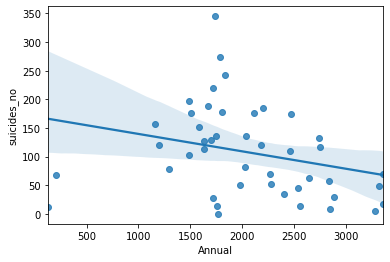

In [70]:
sns.regplot(x="Annual",
                    y="suicides_no",
                    data=solf)

En esta ocasión la menor cantidad de datos puede afectarnos, de hecho existen dos paises los cuales presentan un consumo de alcohol extremadamente reducido, los cuales desvirtuan la posible recta de regresión.

In [71]:
from sklearn.linear_model import LinearRegression
x = solf['Annual'].values.reshape(-1, 1)
y = solf['suicides_no'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(f"Coeficiente de determinación: {r_sq}")
print(f"Intersección con el eje y: {model.intercept_}")
print(f"Pendiente: {model.coef_}")

Coeficiente de determinación: 0.07706326629508409
Intersección con el eje y: [170.08509076]
Pendiente: [[-0.03044031]]


In [110]:
solf.corr()

,suicides_no,Annual
suicides_no,1.000000,-0.277603
Annual,-0.277603,1.000000


Veamos cuales son dichos paises

In [111]:
print(solf[solf['Annual'] < 500])

      country  suicides_no  Annual
23     KUWAIT    11.884396  131.55
29  NICARAGUA    68.723449  202.50


Por las singularidades de estos paises, los excuiremos de este estudio.

In [74]:
solf1=solf[solf['Annual'] > 500]


<AxesSubplot:xlabel='Annual', ylabel='suicides_no'>

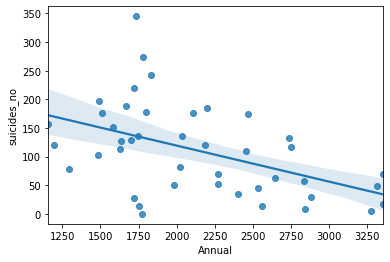

In [75]:
sns.regplot(x="Annual",
                    y="suicides_no",
                    data=solf1)

In [76]:
from sklearn.linear_model import LinearRegression
x = solf1['Annual'].values.reshape(-1, 1)
y = solf1['suicides_no'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(f"Coeficiente de determinación: {r_sq}")
print(f"Intersección con el eje y: {model.intercept_}")
print(f"Pendiente: {model.coef_}")

Coeficiente de determinación: 0.23086598737755493
Intersección con el eje y: [245.10112162]
Pendiente: [[-0.06290922]]


In [112]:
solf1.corr()

,suicides_no,Annual
suicides_no,1.000000,-0.480485
Annual,-0.480485,1.000000


# Salario medio por país

In [78]:
sal = pd.read_excel('sal.xlsx', sheet_name='Hoja1')
sal

,Country,Actual,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Albania,506.532,NaN,NaN,NaN,NaN
1,Argentina,952.130,NaN,NaN,NaN,NaN
2,Armenia,589.135,NaN,NaN,NaN,NaN
3,Australia,3635.135,NaN,NaN,NaN,NaN
4,Austria,2513.460,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
77,United Kingdom,2798.540,NaN,NaN,NaN,NaN
78,United States,4428.800,NaN,NaN,NaN,NaN
79,Uruguay,853.519,NaN,NaN,NaN,NaN
80,Uzbekistan,293.928,NaN,NaN,NaN,NaN


In [79]:
sal.columns

Index(['Country', 'Actual', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [80]:
sal1=sal[['Country','Actual']].copy()
sal1

,Country,Actual
0,Albania,506.532
1,Argentina,952.130
2,Armenia,589.135
3,Australia,3635.135
4,Austria,2513.460
...,...,...
77,United Kingdom,2798.540
78,United States,4428.800
79,Uruguay,853.519
80,Uzbekistan,293.928


In [81]:
sal1.rename(columns = {'Country':'country'}, inplace = True)
sal1

,country,Actual
0,Albania,506.532
1,Argentina,952.130
2,Armenia,589.135
3,Australia,3635.135
4,Austria,2513.460
...,...,...
77,United Kingdom,2798.540
78,United States,4428.800
79,Uruguay,853.519
80,Uzbekistan,293.928


In [82]:
sal1['country']=sal1['country'].str.upper()

In [83]:
salf=summ.merge(sal1, on='country')
salf.corr()

,suicides_no,Actual
suicides_no,1.0000,0.1279
Actual,0.1279,1.0000


In [84]:
salf['suicides_no']=salf['suicides_no']*1000000

<AxesSubplot:xlabel='Actual', ylabel='suicides_no'>

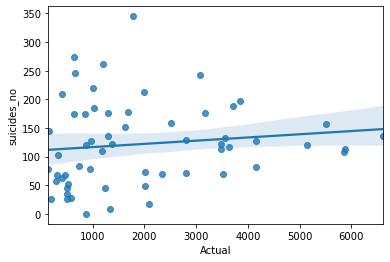

In [85]:
sns.regplot(x="Actual",
                    y="suicides_no",
                    data=salf)

In [86]:
from sklearn.linear_model import LinearRegression
x = salf['Actual'].values.reshape(-1, 1)
y = salf['suicides_no'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(f"Coeficiente de determinación: {r_sq}")
print(f"Intersección con el eje y: {model.intercept_}")
print(f"Pendiente: {model.coef_}")

Coeficiente de determinación: 0.016358384687973238
Intersección con el eje y: [111.09294277]
Pendiente: [[0.00559558]]
